<h2 style = "color: chocolate">Ayudantía N°4: Árboles de Decisión</h2>

---

<p>Ayudante: Diego Bernal</p>

Citas
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html">Problema basado en documentación Sckit</a>

- <a href = "https://cs229.stanford.edu/cs229-notes-decision_trees.pdf">Notas del curso CS229 Lecture Stanford</a>

# Árboles de decisión

Un árbol de decisión puede formalizarse como una función que mapea un conjunto de regiones disjuntas del espacio de entrada a predicciones constantes. Especificamente, podemos definirlo como la siguiente función.

$$
f(x) = \sum_{j=1}^{k} w_j \cdot 1_{x \in R_j}
$$

donde

- ${R_1,R_2,\dots,R_k}$ son regiones disjuntas que particionan el dominio de entrada $R^d$
- $w_j \in R$ es la predicción constante asignada a la región $R_j$.
- $1_{x \in R_j}$ es la función indicadora que vale 1 si $x \in R_j$ y 0 en c.c.

Estas regiones $R_j$ no se solapan entre sí y su union cubre todo el espacio de entrada. formalmente, forman una partición completa y disjunta del dominio.

"Formalmente, un árbol de decisión puede entenderse como una asignación desde un conjunto de $k$  regiones del dominio de entrada ${R_1, R_2, \dots, R_k}$ hacia $k$ predicciones correspondientes ${w_1, w_2, \dots, w_k}$. Estas regiones deben particionar el dominio de entrada, lo que significa que no hay intersección entre ninguna de ellas y que su unión recupera todo el dominio. También requerimos que la predicción para cualquier punto en una región $R_j$ sea la misma, es decir, $w_j$."

Por ejemplo, en $\mathbb{R}^2$, podríamos definir cuatro regiones cuadrantes como:

$$
\begin{aligned}
R_1 &= \{x : x_1 \geq 0,\ x_2 \geq 0\}, \\
R_2 &= \{x : x_1 < 0,\ x_2 \geq 0\}, \\
R_3 &= \{x : x_1 < 0,\ x_2 < 0\}, \\
R_4 &= \{x : x_1 \geq 0,\ x_2 < 0\},
\end{aligned}
$$
y asignar predicciones constantes $w_1, w_2, w_3, w_4$ a cada región.

### Interpretación práctica

- En **regresión**, $w_j$ se suele definir como el promedio de las etiquetas $y^{(i)}$ para los datos de entrenamiento en $R_j$:

$$
w_j = \frac{\sum_{i=1}^n y^{(i)} \cdot \mathbf{1}_{x^{(i)} \in R_j}}{\sum_{i=1}^n \mathbf{1}_{x^{(i)} \in R_j}}
$$

- En **clasificación**, es común que $w_j$ sea la clase más frecuente entre los datos en $R_j$.



# Problematica

Queremos ajustar una función de predicción $f(x)$ que minimice una función de pérdida sobre los datos de entrenamiento:

$$
\mathcal{L}(f) = \sum_{i=1}^{n} \ell(y^{(i)}, f(x^{(i)})) = \sum_{j=1}^{k} \sum_{x^{(i)} \in R_j} \ell(y^{(i)}, w_j), \quad \forall i \in \{1, \dots, n\}, \ \forall j \in \{1, \dots, k\}
$$

donde:
- $\mathcal{L}(f)$: Es la **función de pérdida total** del modelo $f$ sobre todo el conjunto de datos de entrenamiento.
- $\ell(y^{(i)}, f(x^{(i)}))$: Es la **pérdida individual** asociada a la observación $i$. Mide la discrepancia entre el valor real $y^{(i)}$ y la predicción del modelo $f(x^{(i)})$. Antes en las clases vimos, que para regresión se suele usar:  $\ell(y, \hat{y}) = (y - \hat{y})^2$ y en consecuencia en sumatoria representa el error total.
- $k$: Es el #total de regiones(leafs) del árbol.Cada región $R_j$ corresponde a un nodo terminal del árbol.


Esta formula representa **la suma de pérdidas** sobre las regiones $R_j$ del árbol, donde $w_j$ es la predicción constante asignada a la región.

A diferencia de otros modelos como *regresión lineal*, esta función de pérdida **no es suave ni diferenciable**, ya que las regiones $R_j$ se determinan mediante **decisiones discretas**. Por tanto, el problema es **NP-completo** y no se puede resolver con métodos de optimización continua. Se emplea un algoritmo **greedy** basado en la *maximización de una función de ganancia*.

# Maximización de ganancia

Dado que no podemos minimizar directamente la función de pérdida total, en la práctica entrenamos el árbol utilizando un enfoque **greedy**: en cada nodo del árbol buscamos realizar **la mejor división posible** en términos de reducción de pérdida.

Esto se hace mediante la **maximización de una función de ganancia** que evalúa cuánto mejora el modelo al dividir un nodo según una condición binaria del tipo:

$$
x_j < \theta
$$

donde:
- $x_j$ es una de las características (features),
- $\theta$ es un punto de corte (threshold) candidato.

Entonces definimos la ganancia como una reducción de costos, en la que **ganancia** $G(j, \theta)$ por realizar una división según la característica $j$ y umbral $\theta$ se define como:

$$
G(j, \theta) = C(S) - \left[ \frac{|L|}{|S|} C(L) + \frac{|R|}{|S|} C(R) \right]
$$

donde:
- $S$: es el conjunto de datos actual (en el nodo).
- $L$ y $R$: son los subconjuntos que resultan al dividir $S$ según $x_j < \theta$ y $x_j \geq \theta$, respectivamente.
- $C(\cdot)$: es una función de **costo** asociada al conjunto, típicamente el **error cuadrático medio (MSE)**.
- $|L|$ y $|R|$: son las cantidades de ejemplos en cada subconjunto.

La ganancia es la reducción en el error total (costo) al dividir el conjunto actual en dos partes.

Para problemas de regresión, la función de costos puede ser planteada de la siguiente forma:


$$
C(S) = \frac{1}{|S|} \sum_{x^{(i)} \in S} (y^{(i)} - \bar{y}_S)^2
$$

$$
\bar{y}_S = \frac{1}{|S|} \sum_{x^{(i)} \in S} y^{(i)}
$$



# Receta de cocina para regresión

1. **Para cada nodo del árbol:**
   - Para cada característica $x_j$:
     - Ordenar las observaciones según sus valores en $x_j$.
     - Evaluar todos los puntos de corte candidatos $\theta$ entre observaciones consecutivas.
     - Calcular la ganancia:

       $$
       G(j, \theta) = C(S) - \left[ \frac{|L|}{|S|} C(L) + \frac{|R|}{|S|} C(R) \right]
       $$

     - Guardar el mejor par $(j^*, \theta^*)$ que **maximice** la ganancia.

2. **División:**
   - Si $G(j^*, \theta^*) > 0$ (o supera un umbral mínimo), dividir el nodo en dos subconjuntos:
     - **Izquierda:** $x_j < \theta^*$
     - **Derecha:** $x_j \geq \theta^*$
   - Aplicar el mismo proceso **recursivamente** en los nodos hijos.

3. **Criterios de salida(quiebre):**
   - Número mínimo de observaciones en un nodo (`min_samples_split`).
   - Profundidad máxima alcanzada (`max_depth`).
   - La ganancia es menor que un umbral (`min_impurity_decrease`).
   - El nodo ya no se puede dividir más.

4. **Asignación final:**
   - Si se detiene la recursión en un nodo, se convierte en **hoja terminal**.
   - La predicción para esa región será:

     $$
     w_j = \frac{1}{|R_j|} \sum_{x^{(i)} \in R_j} y^{(i)}
     $$

# Ejercicio N°1 (Recnstruccion de imagenes de gatos)

Nos gustaria entrenar un modelo, tal que dada la mitad superior de una imagen en escala de grises, pueda predecir la mitad inferior de la misma imagen.

## Imagenes

Ñas iamgenes originales tienen un tamaño de $64x64 = 4096$ pixeles y estan en una escala (RGB) la cual transformaremos a escala de grises. por lo que las podriamos definir como una matriz $I \in [0, 1]^{64 \times 64}$ normalizada por 255.

division de las imagenes hotizontalmente:

- **Mitad superior**: $I^{\text{upper}} \in \mathbb{R}^{32 \times 64}$
- **Mitad inferior**: $I^{\text{lower}} \in \mathbb{R}^{32 \times 64}$

Luego cada mitad se aplana en un vector:

- $x = \text{vec}(I^{\text{upper}}) \in \mathbb{R}^{2048}$
- $y = \text{vec}(I^{\text{lower}}) \in \mathbb{R}^{2048}$

Buscamos aprender una función:

$
f: \mathbb{R}^{2048} \to \mathbb{R}^{2048}
$

Entonces esperamos que nos devuelva un *vector con la intensidad* en escala de grises para el determinado pixel epara la parte inferior (lower) de la imagen.


In [ ]:
!pip install numpy scikit-learn pillow tqdm kagglehub

<p>Descarga de las imagenes a utilizar en la ayudantía</p>

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("borhanitrash/cat-dataset")

print("Path to dataset files:", path)

100%|██████████| 268M/268M [00:10<00:00, 27.0MB/s] 

Extracting files...


Path to dataset files: C:\Users\Diego\.cache\kagglehub\datasets\borhanitrash\cat-dataset\versions\1


In [1]:
import os
from PIL import Image
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

In [2]:
img_dir = "./imgs/cats/Data/"

In [3]:
img_height = 64
img_width = 64
channels = 3

In [4]:
image_files = sorted([f for f in os.listdir(img_dir) if f.endswith(".png")])

In [5]:
X_list = []
y_list = []
ground_truth = []

In [6]:
for i, file in enumerate(tqdm(image_files[:3000])):
    img_path = os.path.join(img_dir, file)
    try:
        img = Image.open(img_path).convert("L")  
        img = img.resize((img_width, img_height))
        img_np = np.array(img, dtype=np.float32) / 255.0

        gt = img_np.reshape(-1)  

        upper_half = img_np[:img_height // 2, :].reshape(-1) 
        lower_half = img_np[img_height // 2:, :].reshape(-1)  

        X_list.append(upper_half)
        y_list.append(lower_half)
        ground_truth.append(gt)

    except Exception as e:
        print(f"Epic fail {file}: {e}")


100%|██████████| 3000/3000 [00:04<00:00, 605.25it/s]


In [7]:
X = np.array(X_list)              
y = np.array(y_list)               
gt = np.array(ground_truth)        

In [70]:
from pca import generate_n_dimensions, calculate_pca

In [16]:
pca_manual, u_d,pve = calculate_pca(X,n_components=2)

KeyboardInterrupt: 

In [32]:
X_origin = np.zeros(len(u_d))
Y_origin = np.zeros(len(u_d))

U = u_d[:, 0]
V = u_d[:, 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


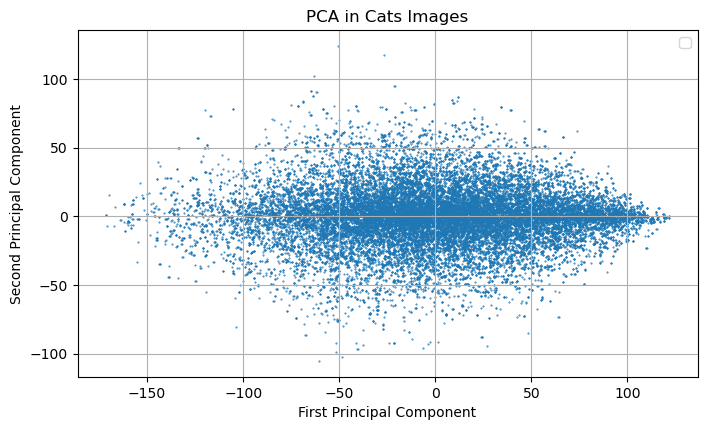

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
ax.scatter(pca_manual[:,0], pca_manual[:,1],s=0.2)
# for i in range(len(columns)):
#     ax.quiver(X_origin[i], Y_origin[i], U[i], V[i], color=colors[i], angles='xy', scale_units='xy', scale=0.5,label = columns[i])
ax.grid(True)
ax.set_title("PCA in Cats Images")
ax.set_xlabel("First Principal Component"); ax.set_ylabel("Second Principal Component")
ax.legend()
plt.show()

In [8]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [9]:
pve_list = np.cumsum(pca.explained_variance_ratio_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


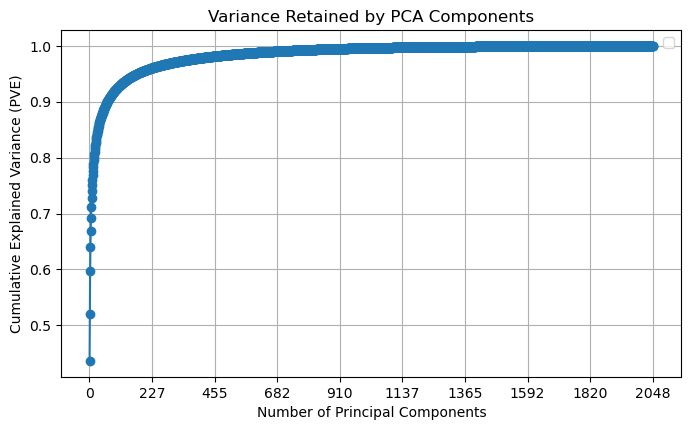

In [10]:
fig, ax =plt.subplots(1,1,figsize = (8,4.5))
x_vals = np.arange(1, len(pve_list) + 1)
ax.plot(x_vals, pve_list, marker='o')

ax.set_xticks(np.linspace(0, len(pve_list), 10, dtype=int))  # Force integer ticks on x-axis
ax.set_title('Variance Retained by PCA Components')
ax.set_xlabel('Number of Principal Components');ax.set_ylabel('Cumulative Explained Variance (PVE)')
ax.grid(True)
ax.legend()
plt.show()

In [11]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        
        i += 1
    return i

min_var(0.95,pca.explained_variance_ratio_)

173

In [12]:
np.random.seed(22)
all_indices = np.arange(len(X))
X_train_orig, X_test_orig, y_train_orig, y_test_orig, gt_train, gt_test = train_test_split(
    X, y, gt, test_size=0.2)


<p>Visualización del arbol simple</p>

In [18]:
pca_X_tree = PCA(n_components=3)
X_train_tree = pca_X_tree.fit_transform(X_train_orig)
pca_y_tree = PCA(n_components=3)
y_train_tree= pca_y_tree.fit_transform(y_train_orig)

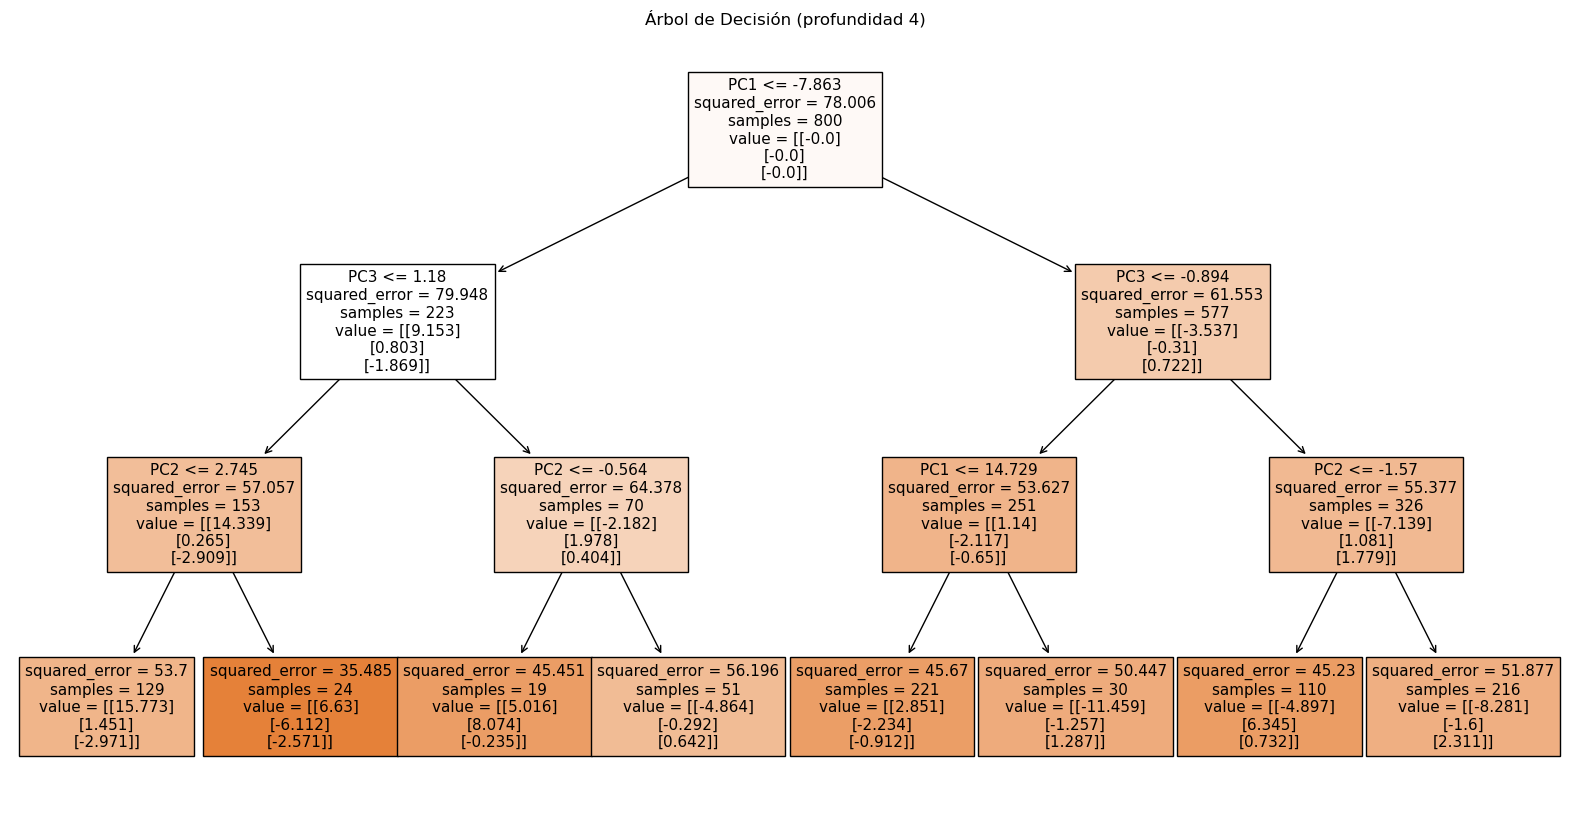

In [17]:
tree_simple = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_simple.fit(X_train_tree, y_train_tree)  

plt.figure(figsize=(20, 10))
plot_tree(tree_simple, filled=True, max_depth=3, feature_names=[f"PC{i+1}" for i in range(X_train_tree.shape[1])])
plt.title("Árbol de Decisión (profundidad 4)")
plt.show()

In [13]:
pca_X = PCA(n_components=173)
X_train = pca_X.fit_transform(X_train_orig)
X_test = pca_X.transform(X_test_orig)

pca_y = PCA(n_components=173)
y_train_reduced = pca_y.fit_transform(y_train_orig)
y_test_reduced = pca_y.transform(y_test_orig)

In [18]:
param_grid = {
    'max_depth': [2,4,6,8,9,10,15,20, 25, 50, 100, 150, 200,250,300],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 5, 10,15]
}

In [19]:
grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=22),
    param_grid,
    scoring='neg_mean_squared_error',  
    cv=5,  
    verbose=1,
    n_jobs=-1
)

In [20]:
grid_search.fit(X_train, y_train_reduced)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=22), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 9, 10, 15, 20, 25, 50, 100,
                                       150, 200, 250, 300],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_squared_error', verbose=1)

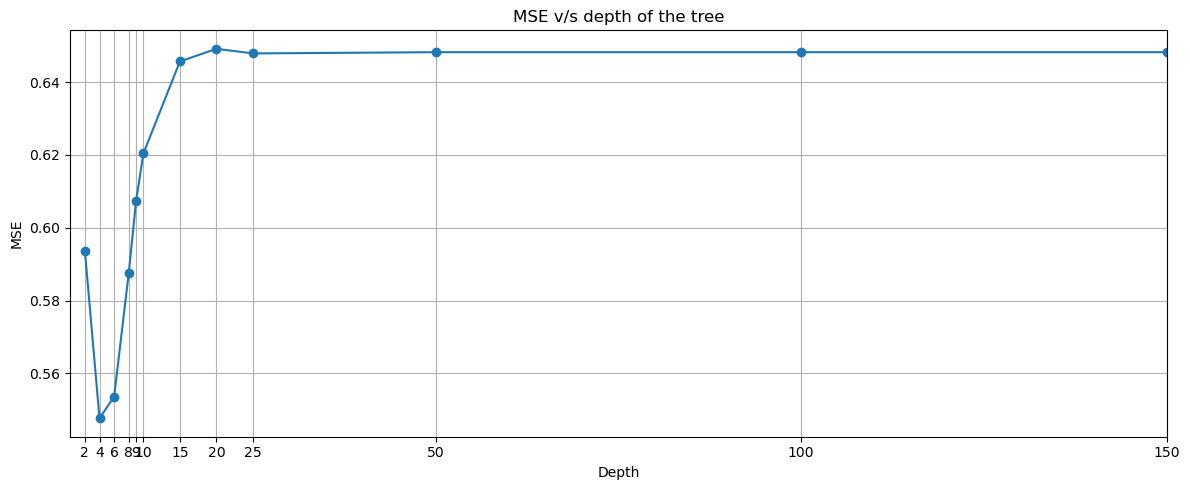

In [25]:
results_gcv = grid_search.cv_results_

max_dephts = [params['max_depth'] for params in results_gcv['params']]


mean_mse = -results_gcv['mean_test_score']

depths = sorted(list(set(max_dephts)))
mean_mse_per = []

for d in depths:
    mse_values = [mean_mse[i] for i in range(len(max_dephts)) if max_dephts[i] == d]
    mean_mse_per.append(np.mean(mse_values))

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(depths,mean_mse_per,marker ='o',linestyle='-')
ax.set_title('MSE v/s depth of the tree')
ax.set_ylabel('MSE');ax.set_xlabel('Depth')
ax.grid(True)
ax.set_xticks(depths)
ax.set_xlim(0,150)

plt.tight_layout()
plt.show()


In [22]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_)

Mejores parámetros: {'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 2}
Mejor score: -0.5429415494810864


In [ ]:
tree_regressor = DecisionTreeRegressor(max_depth=6,min_samples_leaf=15,min_samples_split=2, random_state=22)
tree_regressor.fit(X_train, y_train_reduced)
y_pred_reduced = tree_regressor.predict(X_test)
y_pred = pca_y.inverse_transform(y_pred_reduced)


In [28]:
n_cats = 10

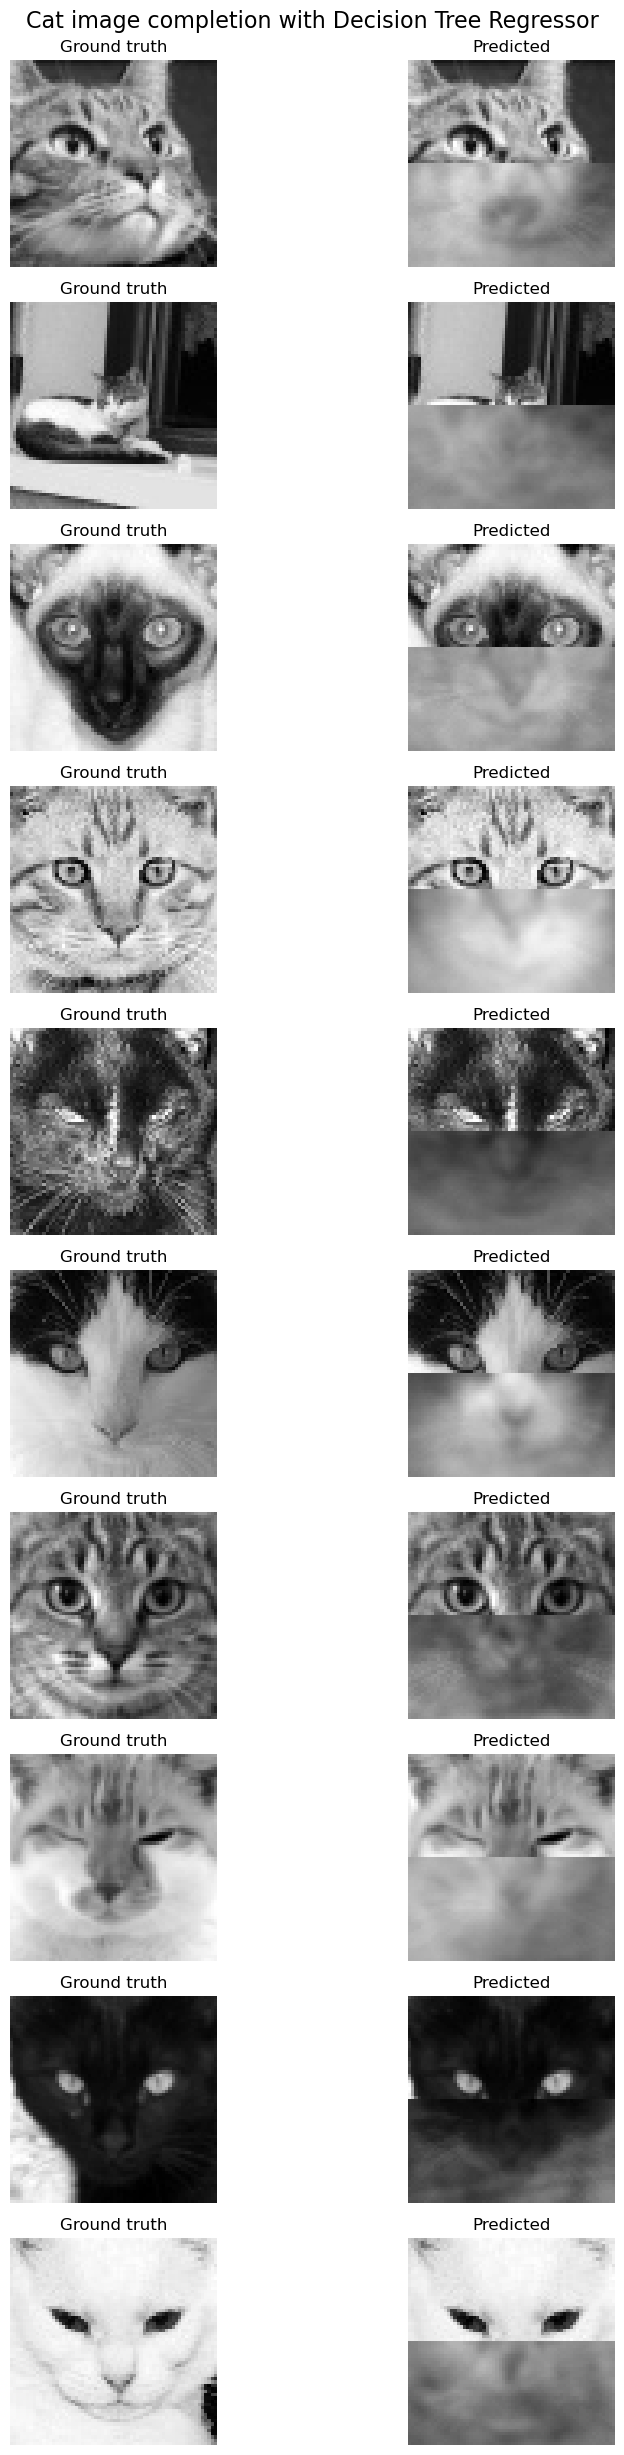

In [29]:
plt.figure(figsize=(10, 2.5 * n_cats))
plt.suptitle("Cat image completion with Decision Tree Regressor\n", size=16)
n_cols = 2

for i in range(n_cats):
    upper = X_test_orig[i].reshape((32, 64))         
    lower_true = y_test_orig[i].reshape((32, 64))
    lower_pred = y_pred[i].reshape((32, 64))

    full_true = np.vstack((upper, lower_true))
    full_pred = np.vstack((upper, lower_pred))

    ax = plt.subplot(n_cats, n_cols, i * n_cols + 1)
    ax.axis("off")
    ax.set_title("Ground truth")
    ax.imshow(full_true, cmap='gray')               

    ax = plt.subplot(n_cats, n_cols, i * n_cols + 2)
    ax.axis("off")
    ax.set_title("Predicted")
    ax.imshow(full_pred, cmap='gray')                

plt.tight_layout()
plt.show()
plt.show()

In [30]:
pca_X = PCA(n_components=130)
pca_y = PCA(n_components=130)

In [31]:
X_train = pca_X.fit_transform(X_train_orig)
X_test = pca_X.transform(X_test_orig)

y_train_reduced = pca_y.fit_transform(y_train_orig)
y_test_reduced = pca_y.transform(y_test_orig)

In [33]:
estimators = {
    "Decision Tree": Pipeline([
        ("regressor", DecisionTreeRegressor(max_depth=10, min_samples_leaf=15, random_state=22))
    ]),
    "Linear": Pipeline([
        ("regressor", LinearRegression())
    ]),
    "Ridge": Pipeline([
        ("regressor", RidgeCV(cv=5))
    ]),
    "Lasso": Pipeline([
        ("regressor", MultiOutputRegressor(LassoCV(cv=5, random_state=22)))
    ])
}

In [34]:
y_preds = {}
for name, pipe in estimators.items():
    pipe.fit(X_train, y_train_reduced)
    y_pred_reduced = pipe.predict(X_test)
    y_pred = pca_y.inverse_transform(y_pred_reduced)
    y_preds[name] = y_pred

In [36]:
mse_dict = {
    name: mean_squared_error(y_test_orig, y_pred)
    for name, y_pred in y_preds.items()
}

In [47]:
n_cats = 10
n_cols = 1 + len(estimators)

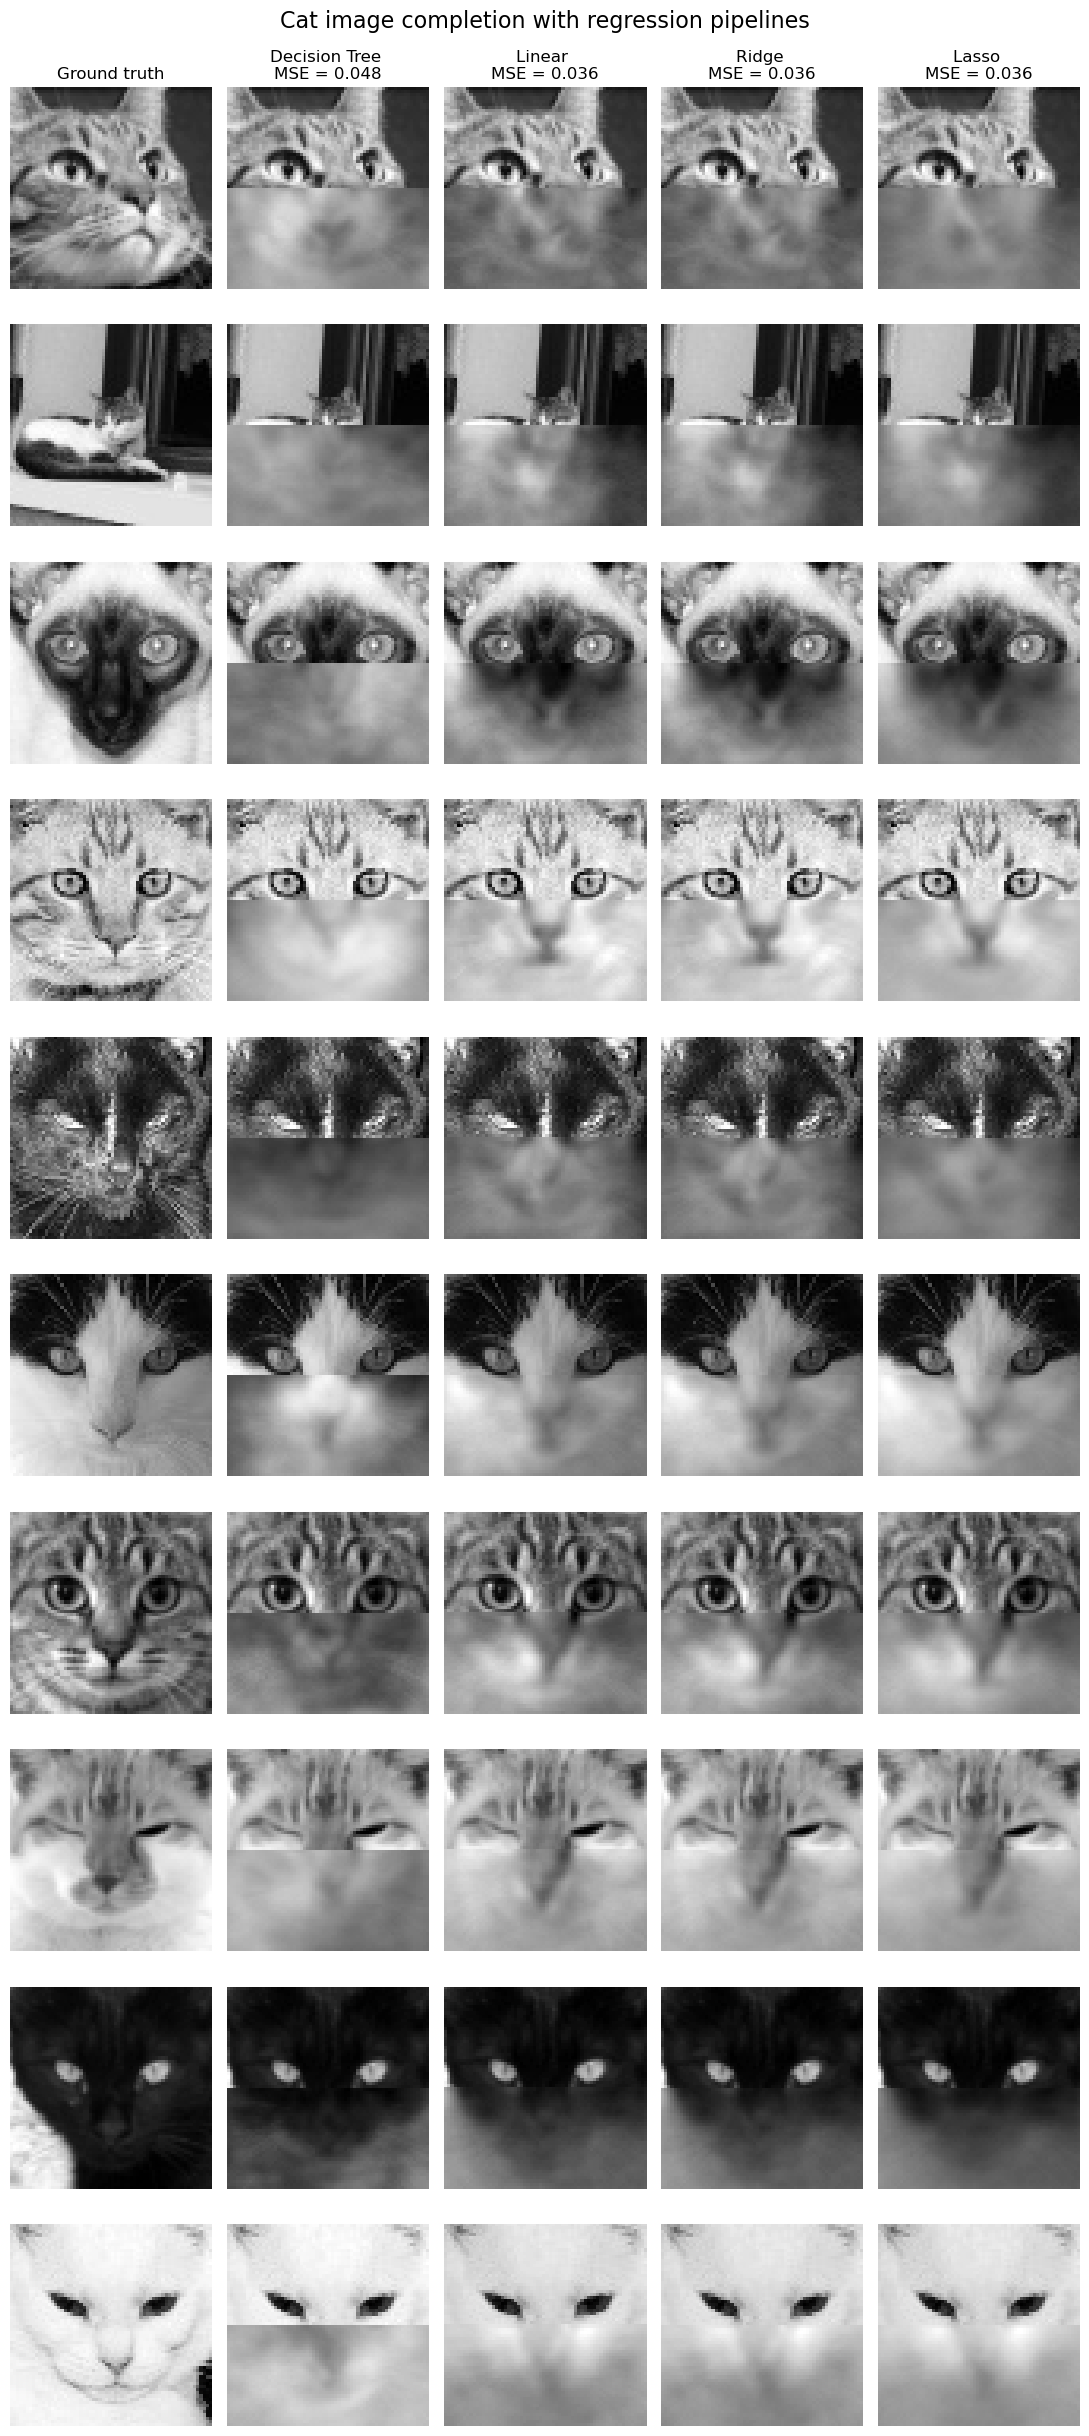

In [49]:
plt.figure(figsize=(2.2 * n_cols, 2.5 * n_cats))
plt.suptitle("Cat image completion with regression pipelines\n", size=16)

for i in range(n_cats):
    upper = X_test_orig[i].reshape((32, 64))
    lower_true = y_test_orig[i].reshape((32, 64))
    full_true = np.vstack((upper, lower_true))

    ax = plt.subplot(n_cats, n_cols, i * n_cols + 1)
    ax.axis("off")
    if i == 0:
        ax.set_title("Ground truth")
    ax.imshow(full_true, cmap='gray')

    for j, (name, y_pred_model) in enumerate(y_preds.items()):
        lower_pred = y_pred_model[i].reshape((32, 64))
        full_pred = np.vstack((upper, lower_pred))

        ax = plt.subplot(n_cats, n_cols, i * n_cols + 2 + j)
        ax.axis("off")
        if i == 0:
            ax.set_title(f"{name} \nMSE = {mse_dict[name]:.3f}")
        ax.imshow(full_pred, cmap='gray')

plt.tight_layout()
plt.show()